1. Package import

In [174]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

2. make array and initilize value

In [175]:
datanum= 300

epoch =1500

# array for graph
train_loss_Array=np.zeros((epoch,1))
test_loss_Array=np.zeros((epoch,1))
W_Array=np.zeros((epoch,4))

x_epoch=np.arange(epoch)

# dot for gradient decent
train_X =np.zeros((datanum,4))
train_Y =np.zeros((datanum,1))

test_X =np.zeros((datanum,4))
test_Y =np.zeros((datanum,1))




3. read train and test data

In [176]:
import csv

with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 0 
    for i in reader:
        print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        train_X[ct][0]= 1
        train_X[ct][1]=i[0]
        train_X[ct][2]=i[1]
        train_X[ct][3]=i[2]
        train_Y[ct][0]=i[3]
        ct += 1

with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 0 
    for i in reader:
        print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        test_X[ct][0]=1
        test_X[ct][1]=i[0]
        test_X[ct][2]=i[1]
        test_X[ct][3]=i[2]
        test_Y[ct][0]=i[3]
        ct += 1

        

[ 0 ] x = 0.27354771453665605 , y =  -8.932101598046074 , z =  18.70868394492699 , h =  73.57882491359598
[ 1 ] x = 5.403327323126673 , y =  4.782976500936417 , z =  -18.76220985503919 , h =  -56.41043333872962
[ 2 ] x = 0.029941312523676267 , y =  -3.2459156984821025 , z =  6.9324982114247895 , h =  52.39076824816363
[ 3 ] x = 3.047974457680872 , y =  0.7152107112924928 , z =  -1.9654187170206976 , h =  -6.936295282007531
[ 4 ] x = 1.3020743188547064 , y =  -5.871807382211632 , z =  -15.702181352019878 , h =  -34.99701707942456
[ 5 ] x = 0.48067768765626884 , y =  -2.9117619875044713 , z =  -2.3631235358529112 , h =  -19.85473503546304
[ 6 ] x = 1.6315020736136816 , y =  9.399052248888598 , z =  2.47547991106324 , h =  4.6693089029172725
[ 7 ] x = 6.373997103111523 , y =  16.58421457152967 , z =  17.896253239300936 , h =  20.327296910572635
[ 8 ] x = 7.003140610383589 , y =  17.425389177900183 , z =  -11.921952696244727 , h =  -96.11724036189486
[ 9 ] x = 11.816393974825985 , y =  10.

[ 183 ] x = 185.26038049581933 , y =  186.7391806845161 , z =  197.24003579486586 , h =  587.0374904413106
[ 184 ] x = 180.642317539346 , y =  183.16592068946662 , z =  189.0593385614477 , h =  592.2208136292573
[ 185 ] x = 187.23970857079172 , y =  191.31900632731293 , z =  177.77069039242974 , h =  505.71923990065034
[ 186 ] x = 181.68066566710783 , y =  186.6230888608061 , z =  171.53321483970035 , h =  478.6345330035732
[ 187 ] x = 187.47427517077338 , y =  185.96606429947087 , z =  178.34963781340542 , h =  547.7384895913088
[ 188 ] x = 188.94791739155573 , y =  190.5461190162295 , z =  182.09902337142145 , h =  517.4349004435243
[ 189 ] x = 185.2641195874885 , y =  191.59221187002265 , z =  199.20837435874878 , h =  609.441452119019
[ 190 ] x = 186.70037619977856 , y =  188.28828137073796 , z =  179.43573378251963 , h =  533.5033173110673
[ 191 ] x = 188.22360579571816 , y =  192.0105127625623 , z =  183.23097656265566 , h =  529.3291738171127
[ 192 ] x = 190.4462275372564 , y = 

[ 19 ] x = 15.655532934093886 , y =  15.635033685930125 , z =  -0.6771021537109903 , h =  -18.322943052610327
[ 20 ] x = 21.397324686962207 , y =  27.147728294694843 , z =  38.58922648125998 , h =  121.45877402261243
[ 21 ] x = 16.39046389976477 , y =  26.804854035421627 , z =  24.443555628098252 , h =  60.55497834131452
[ 22 ] x = 21.537273035910072 , y =  31.24954982224821 , z =  7.327898234643559 , h =  -11.650233670012113
[ 23 ] x = 20.99851872792361 , y =  18.80886874399297 , z =  28.52293981663354 , h =  97.47254050647183
[ 24 ] x = 23.8280260927594 , y =  26.311249018964737 , z =  37.56278673751986 , h =  121.45667500490936
[ 25 ] x = 26.959262840877173 , y =  34.07506930401446 , z =  20.493361826796463 , h =  40.7825715400341
[ 26 ] x = 21.023603021275736 , y =  17.141730727552392 , z =  34.40143782689441 , h =  124.34589287374858
[ 27 ] x = 30.974257437486983 , y =  32.850060312078014 , z =  45.235165791178645 , h =  146.21479997804553
[ 28 ] x = 29.13238303215022 , y =  24.17

[ 155 ] x = 155.14047349716355 , y =  152.73169973275145 , z =  143.32152649578666 , h =  422.9631800148073
[ 156 ] x = 158.10469737180347 , y =  148.49959905631377 , z =  147.53278407374285 , h =  451.2366355541473
[ 157 ] x = 160.8486571240008 , y =  156.8917885749024 , z =  157.25176031356423 , h =  476.07212122845294
[ 158 ] x = 155.3642335571572 , y =  158.61123729143608 , z =  147.75254886143725 , h =  429.15195442003403
[ 159 ] x = 163.54579320263593 , y =  166.45951637457273 , z =  146.60474152539933 , h =  417.0457265550878
[ 160 ] x = 155.52184838106982 , y =  150.39146076859424 , z =  142.99876986558556 , h =  426.7340063062236
[ 161 ] x = 156.6323979729523 , y =  159.26621433494594 , z =  171.72040957206627 , h =  524.9816075913255
[ 162 ] x = 159.2667995936905 , y =  154.7756327798518 , z =  167.99030254801409 , h =  521.6767442260432
[ 163 ] x = 167.79418773221394 , y =  159.7926971696911 , z =  166.44855196156797 , h =  514.0030012391036
[ 164 ] x = 161.7790991917912 , y

[ 292 ] x = 290.7429361034577 , y =  295.8612882630637 , z =  303.6253535353307 , h =  913.5217737186531
[ 293 ] x = 289.71047621192247 , y =  296.3064564532257 , z =  278.2933681653993 , h =  810.2710359670682
[ 294 ] x = 290.8758535218075 , y =  297.50912574802885 , z =  299.4107639232836 , h =  893.5006577188842
[ 295 ] x = 298.7333706708562 , y =  304.29364100726275 , z =  287.492253477109 , h =  840.1151025647666
[ 296 ] x = 294.1550976665022 , y =  297.4747836526016 , z =  312.2735944531995 , h =  948.299908174097
[ 297 ] x = 296.6040036840317 , y =  291.98939749804083 , z =  277.7184800552768 , h =  823.4991289090573
[ 298 ] x = 301.2421664319544 , y =  301.20680081412354 , z =  302.84644435315863 , h =  910.2143422163418
[ 299 ] x = 301.97493976619285 , y =  292.1286693020653 , z =  314.220650038009 , h =  974.6002013140983


4. Processing Gradient decent(training)

In [177]:
lr=0.0000001 #learning Rate

W=np.random.randn(4)*0.1
W=W.reshape(4,1)

W_=np.zeros((4,1))

train_X=train_X.T
train_Y=train_Y.T

test_X=test_X.T
test_Y=test_Y.T

for iter in range(epoch):
    
    #calculate the train loss
    loss=(W*train_X-train_Y)*(W*train_X-train_Y) 
    loss=1/(2*datanum)*np.sum(loss)
    train_loss_Array[iter]=loss
    
    print("train")
    print(loss)
    
    #calculate the train loss
    loss=(W*test_X-test_Y)*(W*test_X-test_Y) 
    loss=1/(2*datanum)*np.sum(loss)
    test_loss_Array[iter]=loss
    
    print("test")
    print(loss)
        
    W_[0] = 1/datanum*np.sum((W*train_X-train_Y)*train_X[0])
    W_[1] = 1/datanum*np.sum((W*train_X-train_Y)*train_X[1])
    W_[2] = 1/datanum*np.sum((W*train_X-train_Y)*train_X[2])
    W_[3] = 1/datanum*np.sum((W*train_X-train_Y)*train_X[3])

#     print(W_)
#     print(W)
    # update the parameters
    W = W - W_ * lr 
    W_Array[iter] = W.reshape(4)
 

train
535915.8647771619
test
533938.3614256317
train
526439.3054669572
test
524477.7449329793
train
517160.55889943114
test
515214.92847542
train
508075.83707439597
test
506146.12183330755
train
499181.4219148319
test
497267.6047717473
train
490473.6639980248
test
488575.72577043436
train
481948.9813095369
test
480066.9007763542
train
473603.8580196055
test
471737.6119789333
train
465434.8432815655
test
463584.4066072397
train
457438.5500519029
test
455603.8957488358
train
449611.6539315491
test
447792.75318989746
train
441950.89202803845
test
440147.7142762167
train
434453.0618381511
test
432665.5747947136
train
427115.02015067724
test
425343.1898750913
train
419933.6819689407
test
418177.47291127045
train
412906.019452727
test
411165.394502251
train
406029.0608792683
test
404303.98141205084
train
399299.88962294534
test
397590.31554838095
train
392715.6431533674
test
391021.5329597193
train
386273.51205150323
test
384594.8228504559
train
379970.7390435391
test
378307.4266137818
train

149828.01609341346
test
150017.70875809778
train
150032.77690856965
test
150226.09149159683
train
150237.52863030325
test
150434.43442599938
train
150442.2387796214
test
150642.70532024937
train
150646.87575005068
test
150850.87280434737
train
150851.4087894368
test
151058.9063611518
train
151055.807982093
test
151266.77630852826
train
151260.0442312903
test
151474.45378184153
train
151464.08924208343
test
151681.91071678308
train
151667.91550446654
test
151889.1198325285
train
151871.49627685148
test
152096.0546152185
train
152074.80556986493
test
152302.68930175732
train
152277.81813045518
test
152508.99886392307
train
152480.50942630667
test
152714.95899278374
train
152682.85563055312
test
152920.54608341388
train
152884.8336067863
test
153125.73721990598
train
153086.42089435292
test
153330.5101606705
train
153287.59569393643
test
153534.84332402074
train
153488.33685341643
test
153738.71577403584
train
153688.6238540017
test
153942.10720669717
train
153888.4367966318
test
154144.9

183148.77491975934
train
182580.8916518817
test
183163.39912058727
train
182595.28993259728
test
183177.8981935014
train
182609.5653753585
test
183192.27322436805
train
182623.7190462426
test
183206.5252900336
train
182637.75200247086
test
183220.65545839266
train
182651.66529247555
test
183234.66478845594
train
182665.4599559663
test
183248.5543304171
train
182679.1370239964
test
183262.32512572024
train
182692.6975190284
test
183275.97820712617
train
182706.1424549994
test
183289.5145987786
train
182719.47283738625
test
183302.93531626993
train
182732.6896632699
test
183316.2413667068
train
182745.79392139977
test
183329.4337487749
train
182758.78659225762
test
183342.5134528036
train
182771.6686481209
test
183355.48146083046
train
182784.44105312586
test
183368.33874666493
train
182797.10476333037
test
183381.08627595162
train
182809.66072677614
test
183393.72500623378
train
182822.10988355073
test
183406.25588701578
train
182834.4531658489
test
183418.67985982532
train
182846.69149

train
184163.3520261638
test
184750.17620295487
train
184164.99386341634
test
184751.79502136583
train
184166.6261967873
test
184753.40424224018
train
184168.24911530947
test
184755.00395545622
train
184169.86270722136
test
184756.59425009077
train
184171.46705997473
test
184758.17521442616
train
184173.06226024107
test
184759.74693595702
train
184174.64839391902
test
184761.3095013978
train
184176.22554614086
test
184762.8629966892
train
184177.7938012793
test
184764.40750700523
train
184179.35324295456
test
184765.94311676006
train
184180.9039540406
test
184767.46990961468
train
184182.44601667233
test
184768.98796848365
train
184183.9795122514
test
184770.49737554154
train
184185.50452145335
test
184771.99821222984
train
184187.02112423384
test
184773.4905592632
train
184188.5293998349
test
184774.974496636
train
184190.02942679162
test
184776.45010362854
train
184191.52128293787
test
184777.9174588138
train
184193.0050454133
test
184779.37664006333
train
184194.4807906687
test
1847

train
184446.49932609094
test
185024.90711085228
train
184447.24386530163
test
185025.6191084358
train
184447.98808240896
test
185026.33077721816
train
184448.73198433564
test
185027.04212418728
train
184449.475577942
test
185027.75315626824
train
184450.21887002705
test
185028.4638803241
train
184450.96186732838
test
185029.17430315627
train
184451.70457652342
test
185029.88443150502
train
184452.4470042295
test
185030.59427205028
train
184453.1891570046
test
185031.30383141182
train
184453.93104134788
test
185032.01311615016
train
184454.6726637
test
185032.72213276688
train
184455.41403044394
test
185033.43088770504
train
184456.15514790532
test
185034.13938735003
train
184456.89602235297
test
185034.84763802993
train
184457.6366599994
test
185035.5556460157
train
184458.37706700148
test
185036.2634175225
train
184459.1172494607
test
185036.97095870925
train
184459.85721342367
test
185037.67827567985
train
184460.59696488286
test
185038.3853744832
train
184461.33650977694
test
18503

train
184661.2136756021
test
185230.2229112863
train
184662.00676118836
test
185230.98287181454
train
184662.80023562978
test
185231.7432212199
train
184663.594099448
test
185232.50396002908
train
184664.38835315983
test
185233.26508876376
train
184665.1829972773
test
185234.026607941
train
184665.9780323078
test
185234.78851807292
train
184666.77345875412
test
185235.55081966726
train
184667.5692771144
test
185236.31351322678
train
184668.36548788217
test
185237.0765992498
train
184669.16209154646
test
185237.84007823013
train
184669.9590885919
test
185238.60395065692
train
184670.75647949855
test
185239.36821701488
train
184671.55426474218
test
185240.13287778437
train
184672.35244479417
test
185240.89793344119
train
184673.15102012144
test
185241.66338445686
train
184673.94999118685
test
185242.42923129856
train
184674.74935844878
test
185243.19547442923
train
184675.54912236167
test
185243.96211430753
train
184676.34928337552
test
185244.72915138787
train
184677.14984193642
test
18

5. plotting the input data

(1500, 4)
(4, 1500)
(1500,)
(1500,)


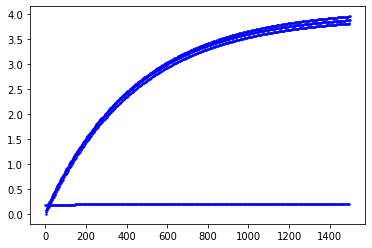

In [178]:
print(W_Array.shape)

W_Array=W_Array.reshape(4,epoch)
print(W_Array.shape)

print(W_Array[0].shape)
print(x_epoch.shape)


plt.scatter(x_epoch,W_Array[0],c="b",s=2)
plt.show()

6. plotting the output results

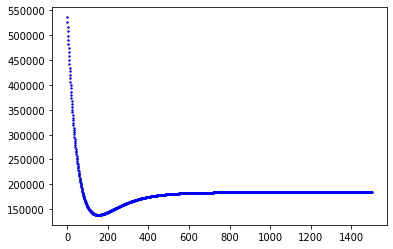

In [179]:
plt.scatter(x_epoch,train_loss_Array,c="b",s=2)
plt.show()

7. plotting the energy values

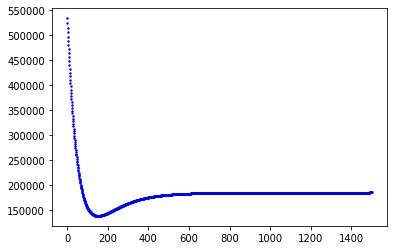

In [180]:
plt.scatter(x_epoch,test_loss_Array,c="b",s=2)
plt.show()